<a href="https://colab.research.google.com/github/zal-developer/Adult-Income-Car-Insurance/blob/main/Choice_DataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First choice: dataset 1

-  Adult Income Dataset

In [121]:
# Load and preview data
income_fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/adult_income.csv"
df = pd.read_csv(income_fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


1. Source of data

   - Kaggle

2. Brief description of data

   - An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc

3. What is the target?

   -  Income

4. What does one row represent? (A person? A business? An event? A product?)

     -  Person

5. Is this a classification or regression problem?

      -  Its a classification problem since the target(income) has binary classes(<=50K or >50K)

6. How many features does the data have?

      -  15 features

7. How many rows are in the dataset?

      -  48842 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

     -  There are missing values and unknown values in the data,represented by ? and 'unknown'.
     - There may be imbalanced classes more so in the target where one class dominates the other.
     - determining which features influence the highest levels of the target.

1a.) Deleting unnecessary columns.

In [122]:
# specifying columns to delete
columns_to_drop = ['fnlwgt', 'educational-num', 'relationship', 'race', 'native-country']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
df.head()

,age,workclass,education,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Male,0,0,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,0,0,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,>50K
4,18,?,Some-college,Never-married,?,Female,0,0,30,<=50K


- I dropped the above columns because they have little to no effect on the target.

b) Deleting duplicate rows.

In [123]:
# Count the duplicates
df.duplicated().sum()

10511

In [124]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

c) Identified and addressed missing values.

In [125]:
#count the missing values
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

 - the dataset has no missing values.

d) Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [126]:
#identifying object cols
string_cols=df.select_dtypes('object').columns
for col in string_cols:
#showing value counts for each object column
  print(f'value_counts for {col}')
  print(df[col].value_counts())
  print('\n')

value_counts for workclass
workclass
Private             24660
Self-emp-not-inc     3683
Local-gov            2907
?                    2179
State-gov            1873
Self-emp-inc         1639
Federal-gov          1359
Without-pay            21
Never-worked           10
Name: count, dtype: int64


value_counts for education
education
HS-grad         11068
Some-college     8061
Bachelors        6395
Masters          2404
Assoc-voc        1872
Assoc-acdm       1526
11th             1460
10th             1194
7th-8th           889
Prof-school       803
9th               718
12th              580
Doctorate         566
5th-6th           476
1st-4th           240
Preschool          79
Name: count, dtype: int64


value_counts for marital-status
marital-status
Married-civ-spouse       18208
Never-married            10881
Divorced                  5669
Widowed                   1475
Separated                 1439
Married-spouse-absent      622
Married-AF-spouse           37
Name: count, dtype: 

In [127]:
# Replace '?' with NaN
df[['workclass', 'occupation']] = df[['workclass', 'occupation']].replace('?', np.nan)

# Fill the column's nulls with "MISSING"
df[['workclass','occupation']] = df[['workclass','occupation']].fillna("MISSING")
# Print the value counts
df['workclass'].value_counts(dropna=False)


workclass
Private             24660
Self-emp-not-inc     3683
Local-gov            2907
MISSING              2179
State-gov            1873
Self-emp-inc         1639
Federal-gov          1359
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [128]:
df['occupation'].value_counts()

occupation
Prof-specialty       5353
Exec-managerial      5080
Sales                4325
Craft-repair         4185
Adm-clerical         4070
Other-service        3766
MISSING              2189
Machine-op-inspct    2078
Transport-moving     1936
Handlers-cleaners    1496
Farming-fishing      1409
Tech-support         1280
Protective-serv       911
Priv-house-serv       238
Armed-Forces           15
Name: count, dtype: int64

e.) Produced univariate visuals for the target and all features.


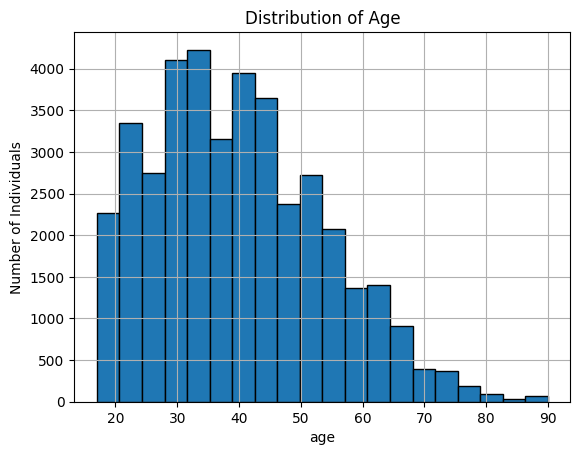

In [103]:
# Create a histogram for age feature
ax = df['age'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Age')
ax.set_xlabel('age')
ax.set_ylabel('Number of Individuals');

  -  Most people are between the ages of 20 and 60.
  
  There seems to be a few who are below 20 years and above 80years.

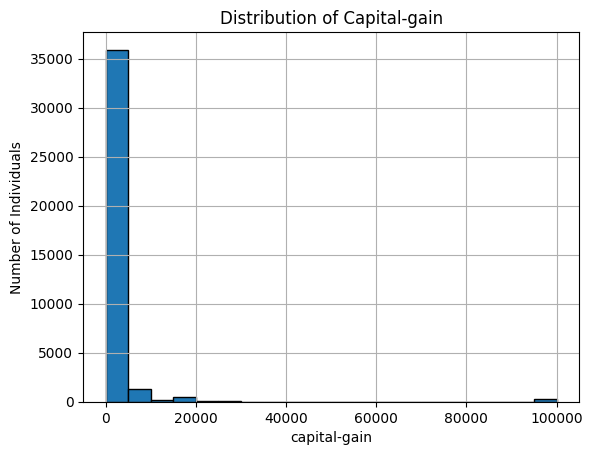

In [129]:
#Create a histogram for age feature
ax = df['capital-gain'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Capital-gain')
ax.set_xlabel('capital-gain')
ax.set_ylabel('Number of Individuals');

  -  The highest range of capital gains are below 20000 and also, there is a very low amount of capital gains above 90000.

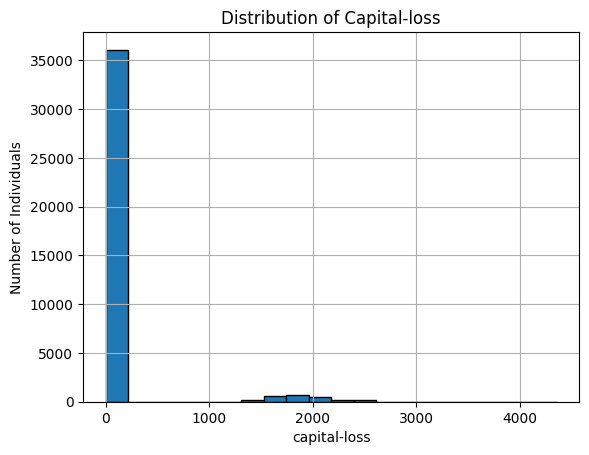

In [131]:
#Create a histogram for age feature
ax = df['capital-loss'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Capital-loss')
ax.set_xlabel('capital-loss')
ax.set_ylabel('Number of Individuals');

  -  The tallest bar is located at the zero mark on the x-axis. This indicates a significant number of individuals with no reported capital loss.
   
- Overall, the distribution is right-skewed, with most individuals having no capital loss and only a small subset experiencing losses.

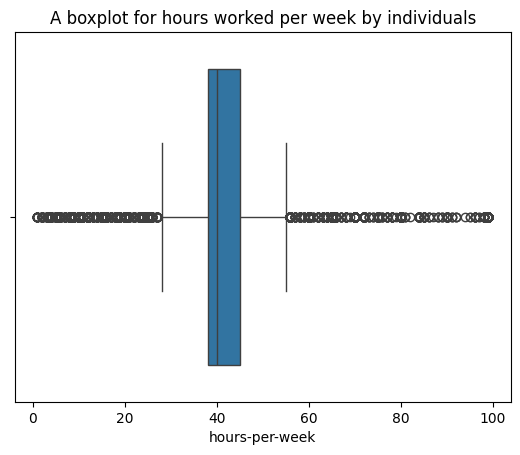

In [105]:
# Create a horizontal boxplot for hours per week
ax = sns.boxplot(data=df, x="hours-per-week")
ax.set_title('A boxplot for hours worked per week by individuals');

- The median indicates that the typical hours worked per week by individuals is around 40.

- On the left side (lower end), there are more outliers. These represent individuals who work significantly fewer hours than the median.
On the right side (higher end), there are fewer outliers. These represent individuals who work significantly more hours than the median.


<ipython-input-109-c51fc178d7c9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


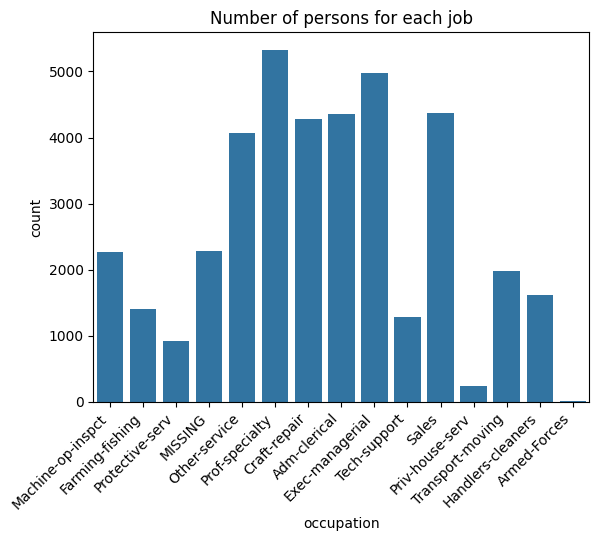

In [109]:
# Countplot for occupation
ax = sns.countplot(data=df, x="occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Number of persons for each job');

- Pro-speciality,Exec-managerial and Adm-clerical are some of the most prevalent jobs while Priv-house-serv and Protective-serv are rare.

<ipython-input-110-f4039c3cae7a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


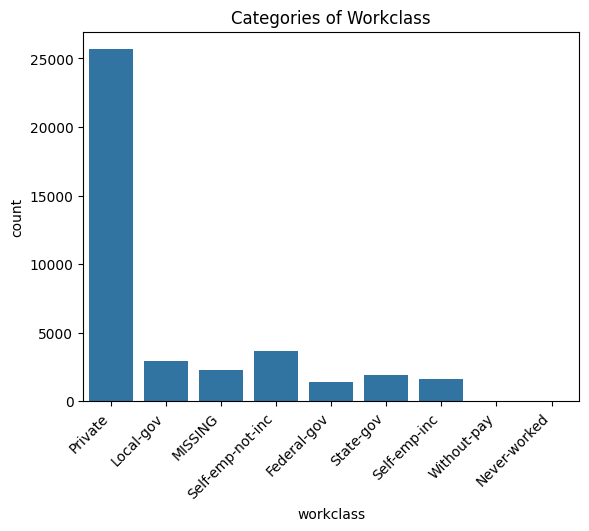

In [110]:
# Countplot for workclass
ax = sns.countplot(data=df, x="workclass")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Categories of Workclass');

- A significant number of individuals fall into the private employment category.

- People under Without-pay and Never-worked categories seem to barely have any individuals.

<ipython-input-112-19a13fa929cb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


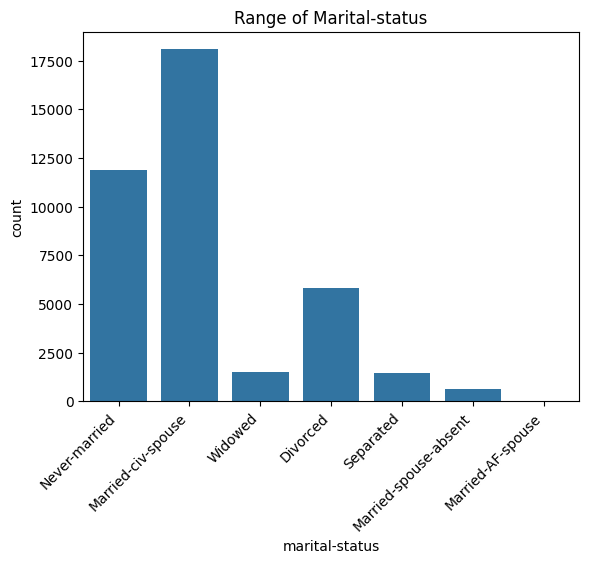

In [112]:
# Countplot for marital status
ax = sns.countplot(data=df, x="marital-status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Range of Marital-status');

- The countplot highlights the prevalence of never-married and married-civ-spouse individuals.


<ipython-input-113-4b66cf57942a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


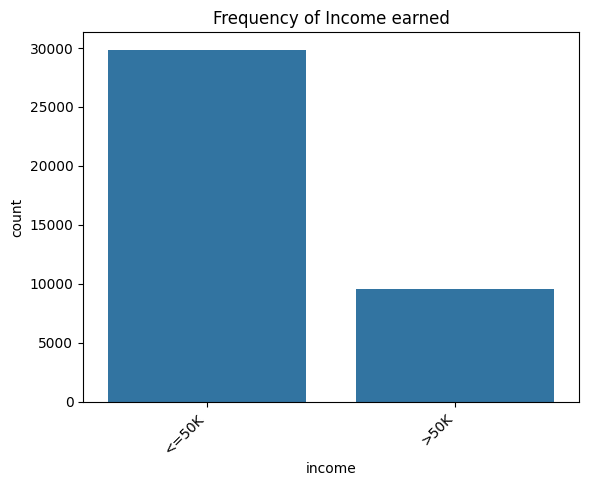

In [113]:
# Countplot for income
ax = sns.countplot(data=df, x="income")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Frequency of Income earned');

- Individuals that earn less or equal to 50000 are way more than those who earn higher than 50000.

<ipython-input-114-df8218267fa6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


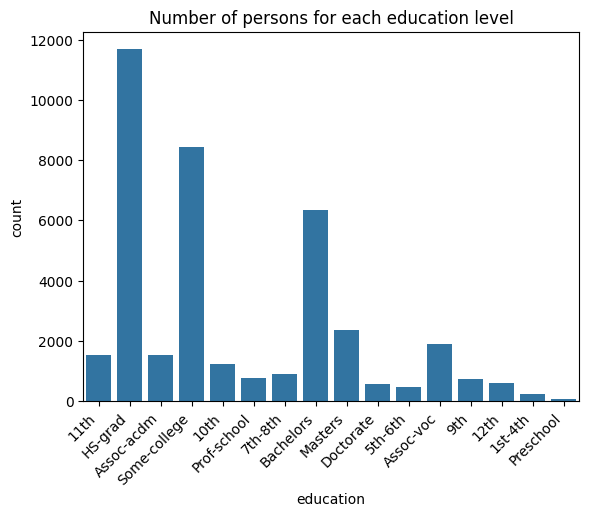

In [114]:
# Countplot for education
ax = sns.countplot(data=df, x="education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Number of persons for each education level');

 - The graph highlights the prevalence of high school graduates and individuals with some college experience.Pre-school graduates and 1st-4th graders have the least number of individuals.

<ipython-input-133-4dc26c09f8a6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


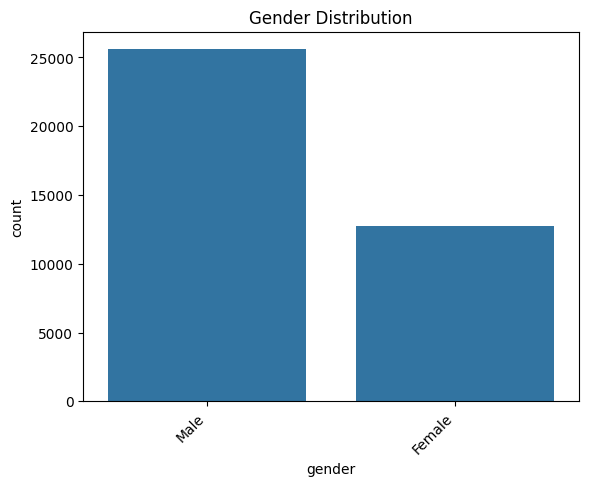

In [133]:
# Countplot for gender
ax = sns.countplot(data=df, x="gender")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Gender Distribution');

- There are more males than females in the data distribution.

# Second choice: dataset 2

 -  Car Insurance Dataset

In [4]:
# Load and preview data
insurance_fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(insurance_fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


1. Source of data

   - Kaggle

2. Brief description of data

   - The data is about a company's  annual car insurance data. The columns are resembling practical world features.
   
    The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

3. What is the target?

   -  Outcome

4. What does one row represent? (A person? A business? An event? A product?)

     -  Person

5. Is this a classification or regression problem?

      -  Its a classification problem since the outcome column indicates 1 if a customer has claimed his/her loan else 0.

6. How many features does the data have?

      -  19 features

7. How many rows are in the dataset?

      -  10000 rows

  8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

      - There are missing values that i will have to find ways on how to handle them.
      - Deciding on which features will be vital in predicting the outcome.
      - There is determining how different features impact the outcome.
     
    

1a.) Deleting unnecessary columns

In [5]:
# specifying columns to delete
columns_to_drop = ['ID', 'AGE','RACE', 'DRIVING_EXPERIENCE','POSTAL_CODE']
df.drop(columns=columns_to_drop, inplace=True)
# Verify the updated DataFrame
df.head()

,GENDER,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,female,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,male,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,female,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,male,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,male,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


- I dropped the above columns because they have little to no effect on the outcome.

b) Deleted duplicate rows.

In [20]:
# Count the duplicates
df.duplicated().sum()

52

In [21]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

c) Identified and addressed missing values.

In [22]:
#count the missing values
df.isna().sum()

GENDER                   0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           930
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         949
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [139]:
#filling null values with mean
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(np.mean(df["CREDIT_SCORE"]))
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(np.mean(df["ANNUAL_MILEAGE"]))
df.isna().sum()

GENDER                 0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

- I filled null values in the numeric columns with mean so as to preserve the central tendency and avoid introducing bias.


d) Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).


In [23]:
#identifying object cols
string_cols=df.select_dtypes('object').columns
for col in string_cols:
#showing value counts for each object column
  print(f'value_counts for {col}')
  print(df[col].value_counts())
  print('\n')

value_counts for GENDER
GENDER
female    4983
male      4965
Name: count, dtype: int64


value_counts for EDUCATION
EDUCATION
high school    4136
university     3912
none           1900
Name: count, dtype: int64


value_counts for INCOME
INCOME
upper class      4318
middle class     2135
poverty          1793
working class    1702
Name: count, dtype: int64


value_counts for VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6925
after 2015     3023
Name: count, dtype: int64


value_counts for VEHICLE_TYPE
VEHICLE_TYPE
sedan         9471
sports car     477
Name: count, dtype: int64




 -  There arent inconsistencies in the data.

e) Produced univariate visuals for the target and all features.

-    I used countplots to visualize categorical features so as ;

  -  To identify the most common and least common categories.

  - To see how the distribution of categories differs between different groups.

   - To identify any potential outliers or unusual values.

<ipython-input-142-8564abd1033e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


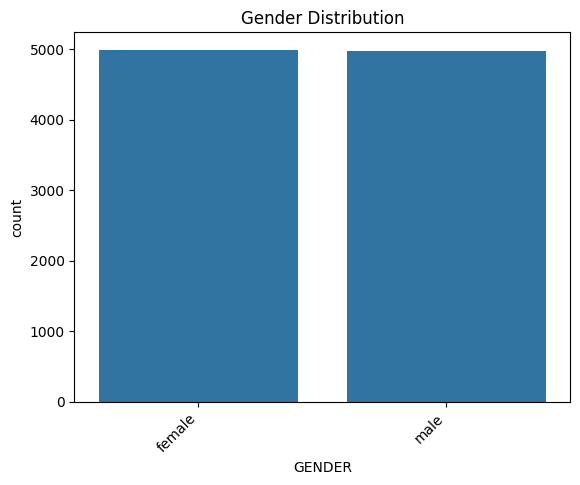

In [142]:
# Countplot for gender
ax = sns.countplot(data=df, x="GENDER")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Gender Distribution');

- The nearly equal representation of females and males indicates a balanced dataset in terms of gender.

<ipython-input-143-7c0c7babda91>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


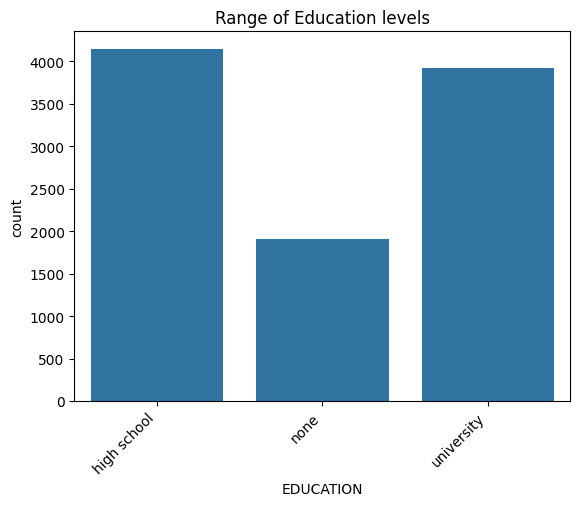

In [143]:
#Countplot for education
ax = sns.countplot(data=df, x="EDUCATION")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Range of Education levels');

- It highlights the prevalence of high school graduates and individuals with a university education better than those with no qualification.

<ipython-input-144-c437bd657768>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


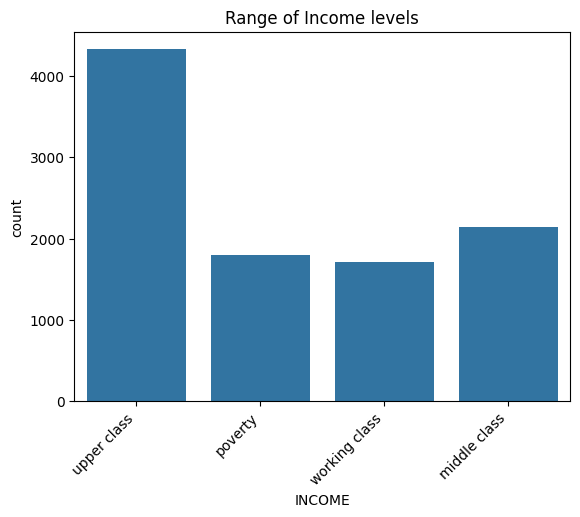

In [144]:
#Countplot for income
ax = sns.countplot(data=df, x="INCOME")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Range of Income levels');

- It highlights the prevalence of individuals in the Upper class and the relatively smaller number of individuals in poverty and working class.

<ipython-input-145-5b59e3b9361a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


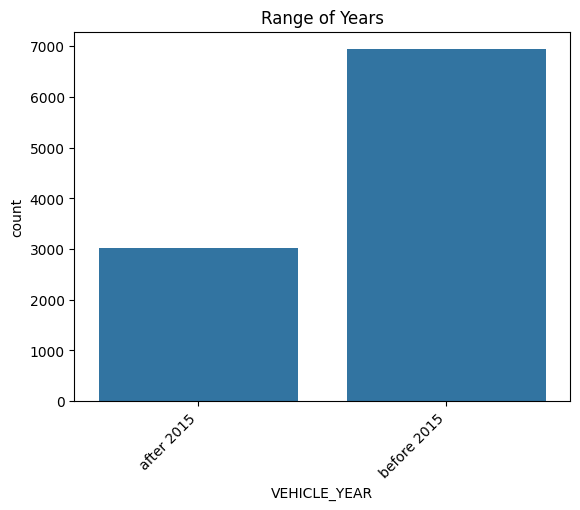

In [145]:
#Countplot for vehicle year
ax = sns.countplot(data=df, x="VEHICLE_YEAR")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Range of Years');

- There are more cars made before the year 2015 than after.

<ipython-input-146-a890eb4f88f6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


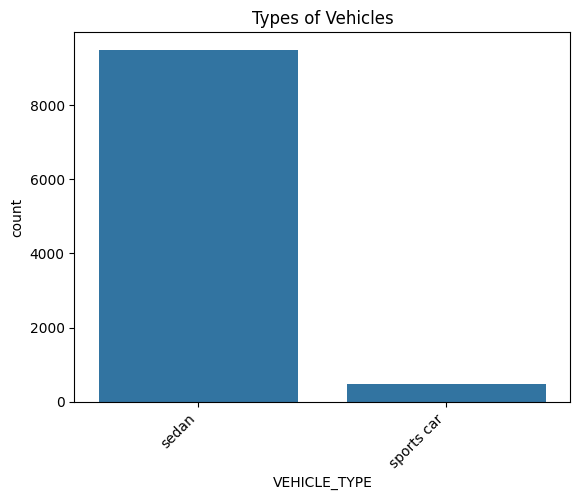

In [146]:
#Countplot for vehicle type
ax = sns.countplot(data=df, x="VEHICLE_TYPE")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Types of Vehicles');

- Sedans are the most prevalent type, while sports cars are relatively rare.

- I used histograms and boxplot to visualize numeric features because;

  - They visualize the shape of the distribution: Histograms show the frequency of data points falling into different bins. This shows if the data is normally distributed, skewed, or has any other interesting shapes.

  - They identify outliers: Outliers are data points that are significantly different from the rest of the data. They identify outliers by showing you which bins have very few or no data points.

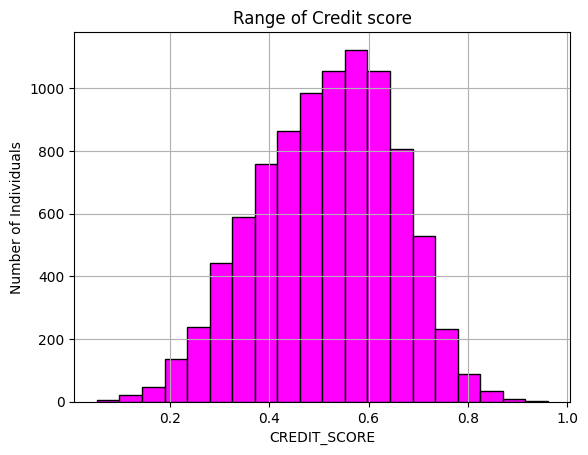

In [11]:
# Create a histogram for credit-score
ax = df['CREDIT_SCORE'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Credit score')
ax.set_xlabel('CREDIT_SCORE')
ax.set_ylabel('Number of Individuals');

Most individuals have credit scores in the moderate range (around 0.4 to 0.8).

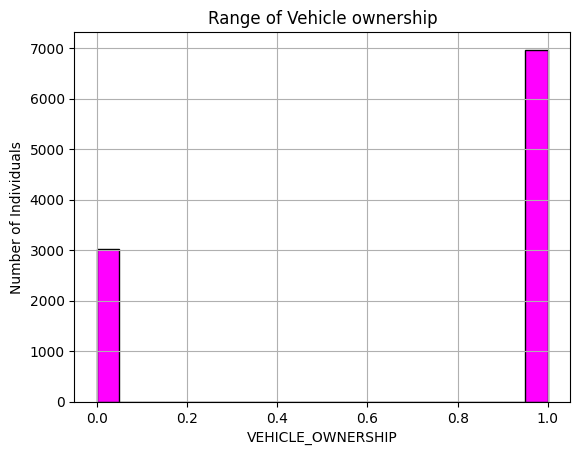

In [12]:
# Create a histogram for vehicle ownership feature
ax = df['VEHICLE_OWNERSHIP'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Vehicle ownership')
ax.set_xlabel('VEHICLE_OWNERSHIP')
ax.set_ylabel('Number of Individuals');

- Most individuals have some level of vehicle ownership, with a large proportion owning vehicles.


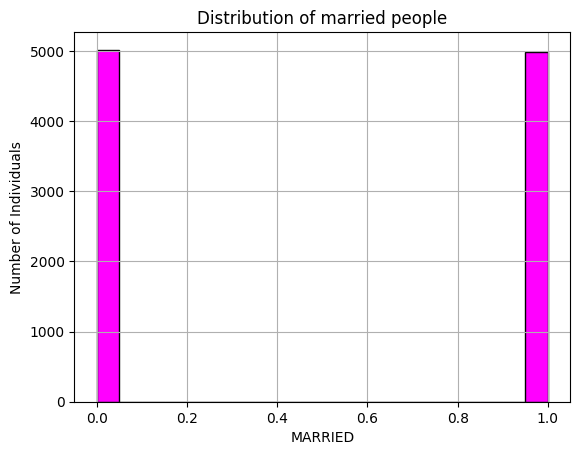

In [14]:
# Create a histogram for married feature
ax = df['MARRIED'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Distribution of married people')
ax.set_xlabel('MARRIED')
ax.set_ylabel('Number of Individuals');

- The married and unmarried are relatively equal.

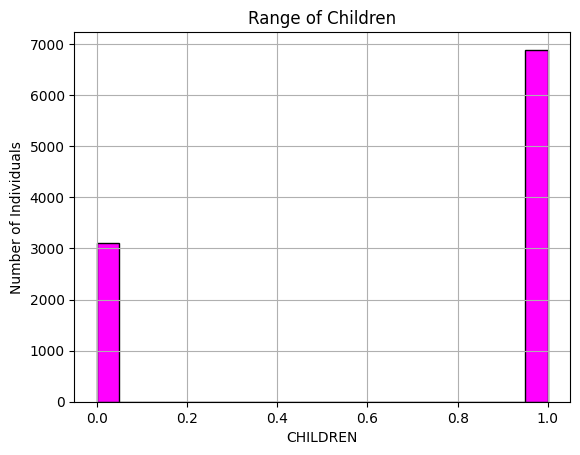

In [15]:
# Create a histogram for children feature
ax = df['CHILDREN'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Children')
ax.set_xlabel('CHILDREN')
ax.set_ylabel('Number of Individuals');

- A bigger portion of the people have children.

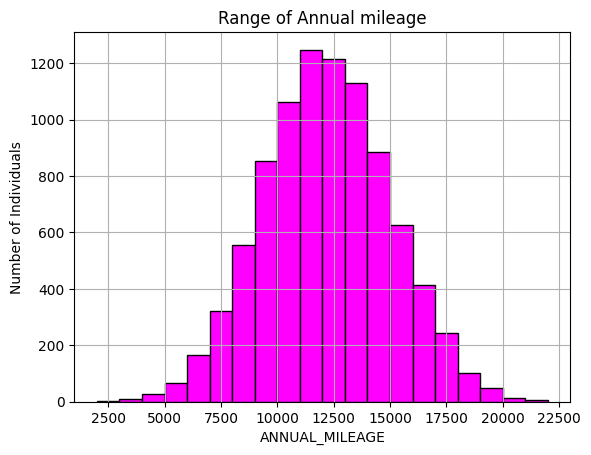

In [24]:
# Create a histogram for annual mileage
ax = df['ANNUAL_MILEAGE'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Annual mileage')
ax.set_xlabel('ANNUAL_MILEAGE')
ax.set_ylabel('Number of Individuals');

- The highest ranges of annual mileage are between 7500 and 17500.

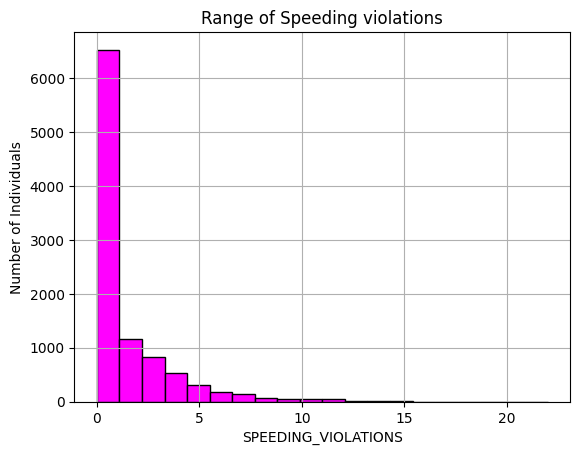

In [25]:
# Create a histogram for speeding violations
ax = df['SPEEDING_VIOLATIONS'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Speeding violations')
ax.set_xlabel('SPEEDING_VIOLATIONS')
ax.set_ylabel('Number of Individuals');

- Most individuals are law-abiding drivers with no recorded speeding violations.

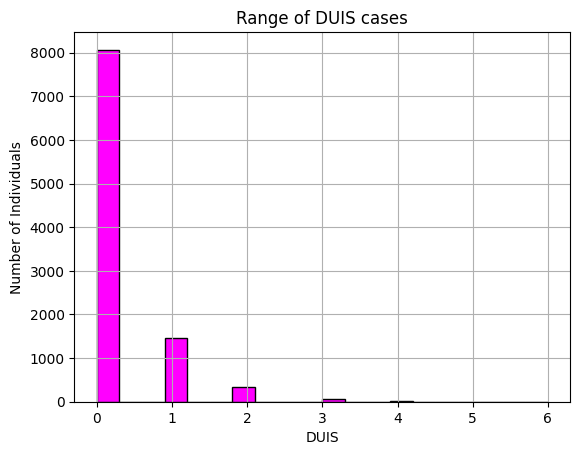

In [26]:
# Create a histogram for Duis
ax = df['DUIS'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of DUIS cases')
ax.set_xlabel('DUIS')
ax.set_ylabel('Number of Individuals');

- Most individuals are law-abiding drivers with no recorded DUI incidents.

- Most individuals in the dataset have a clean driving record with no recorded past accidents.
A smaller proportion of individuals have been involved in at least one accident.


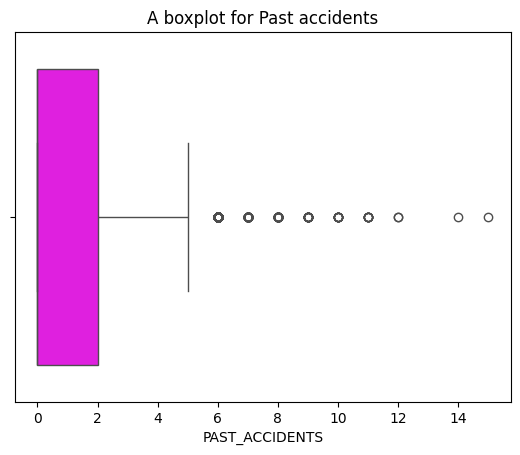

In [6]:
#Create a horizontal boxplot for past accidents
ax = sns.boxplot(data=df, x="PAST_ACCIDENTS",color='magenta')
ax.set_title('A boxplot for Past accidents');

- Most individuals in the dataset have a clean driving record with no recorded past accidents. A smaller proportion of individuals have been involved in at least one accident.

- There are also outliers of more past accidents beyond the maximum.

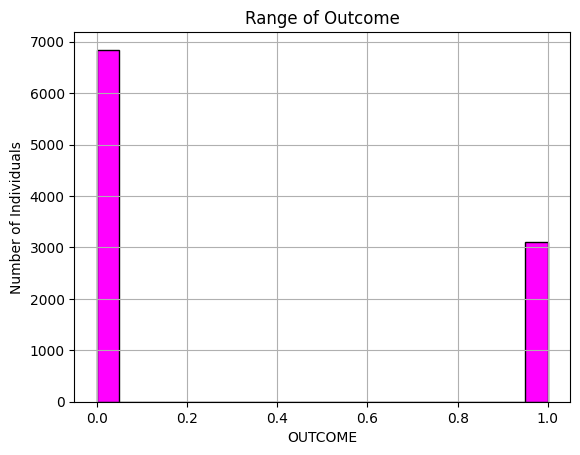

In [28]:
# Create a histogram for outcome
ax = df['OUTCOME'].hist(bins =20, edgecolor = 'black',color='magenta')
ax.set_title('Range of Outcome')
ax.set_xlabel('OUTCOME')
ax.set_ylabel('Number of Individuals');

- There are more people who stand to not claim their loan than those who would claim their loan.